# Visualising COLET Dataset

## Set-Up and Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os, sys
from pathlib import Path
sys.path.extend([str(Path(os.getcwd()).parent.parent.resolve())])

## Subject Information

In [4]:
# get subject info for participant 0
subject_info = pd.read_csv("../../data/colet/subject_info.csv")
subject_info.iloc[0]

Age                       28
Education                 18
Gender                     F
VisualAcuity_logMAR_   -0.04
Name: 0, dtype: object

This person is a 28-year old female individual with 18 years of education.

## Gaze Data

In [5]:
from inputs.gaze import Gaze2D

In [6]:
task0_gaze = Gaze2D.from_pupil_capture("../../data/colet/participant0/task0/gaze.csv")
task0_gaze

                t         x         y
0     5410.551715  0.446264  0.846886
1     5410.555834  0.446534  0.847007
2     5410.559774  0.446660  0.846410
3     5410.563583  0.446442  0.845542
4     5410.568291  0.446472  0.845614
...           ...       ...       ...
8200  5444.341634  0.548112  0.687153
8201  5444.345790  0.718034  1.055603
8202  5444.350231  0.501854  0.814781
8203  5444.353666  0.763209  0.862900
8204  5444.357724  0.507364  0.817766

[8205 rows x 3 columns]

Let's try plotting out the 2D normalized position of the gaze data here.

<Axes3D: xlabel='t', ylabel='x', zlabel='y'>

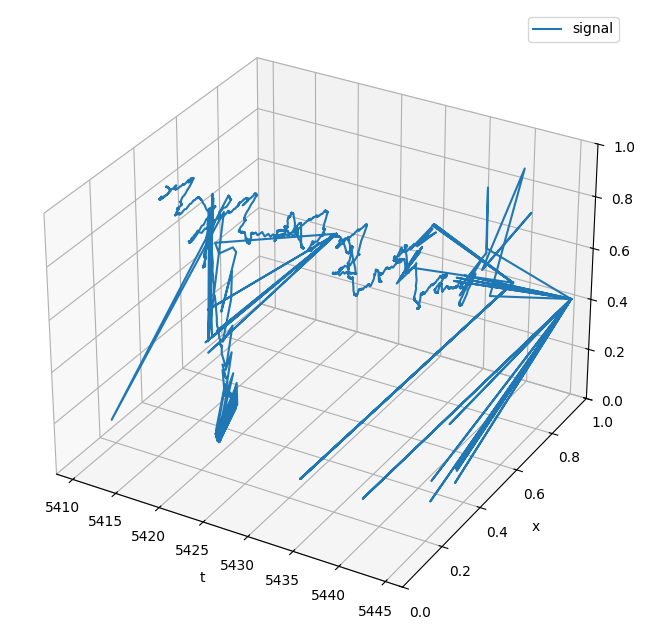

In [7]:
task0_gaze.plot_gaze2d_time()

Now, let's try to denoise the gaze data using the _slow_ NSLR method here:

C:\Users\prann\raid\bci\eyet\eyetrack\core\slow_nslr.py:171: RuntimeWarning: divide by zero encountered in divide
  lp = logit_pinc + -1.0*log(1/dt)
C:\Users\prann\raid\bci\eyet\eyetrack\core\slow_nslr.py:172: RuntimeWarning: divide by zero encountered in log
  return log(1/(1 + exp(-lp)))


<Axes3D: xlabel='t', ylabel='x', zlabel='y'>

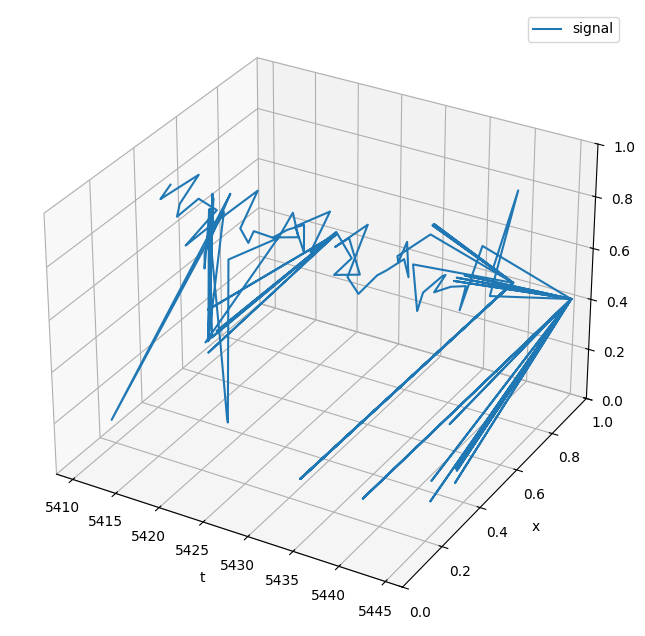

In [8]:
smoothed_gaze = task0_gaze.smooth_gaze2d()
smoothed_gaze.plot_gaze2d_time()

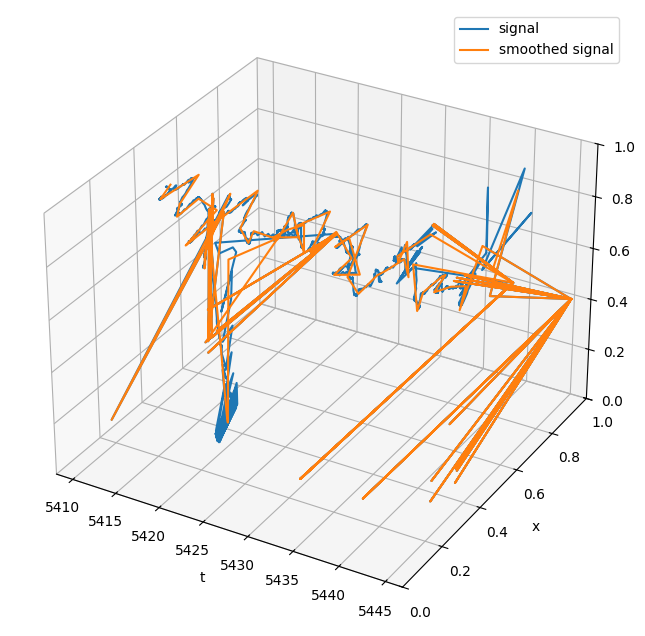

In [9]:
ax = task0_gaze.plot_gaze2d_time()
ax = smoothed_gaze.plot_gaze2d_time(ax, label="smoothed signal")

The algorithm appears to make a bunch of very significantly linear components.

## Pupil Data

In [10]:
from inputs.pupil import Pupil

pupil = Pupil.from_pupil_capture("../../data/colet/participant0/task0/pupil.csv")
pupil

                t       lpd       rpd        pd        ba
0     5410.555834  3.943597  3.778976  3.861286  0.164621
1     5410.563583  3.952273  3.828814  3.890543  0.123459
2     5410.572813  3.962226  3.801662  3.881944  0.160564
3     5410.579588  3.949373  3.821945  3.885659  0.127428
4     5410.588391  3.969912  3.830592  3.900252  0.139320
...           ...       ...       ...       ...       ...
4096  5444.319871  0.000000  0.000000  0.000000  0.000000
4097  5444.327888  0.000000  0.000000  0.000000  0.000000
4098  5444.335716  0.000000  2.920948  1.460474 -2.920948
4099  5444.343986  0.000000  4.145481  2.072740 -4.145481
4100  5444.351757  4.455929  4.153479  4.304704  0.302450

[4101 rows x 5 columns]

Let's plot the diameter of the pupil against time.

<Axes: xlabel='t'>

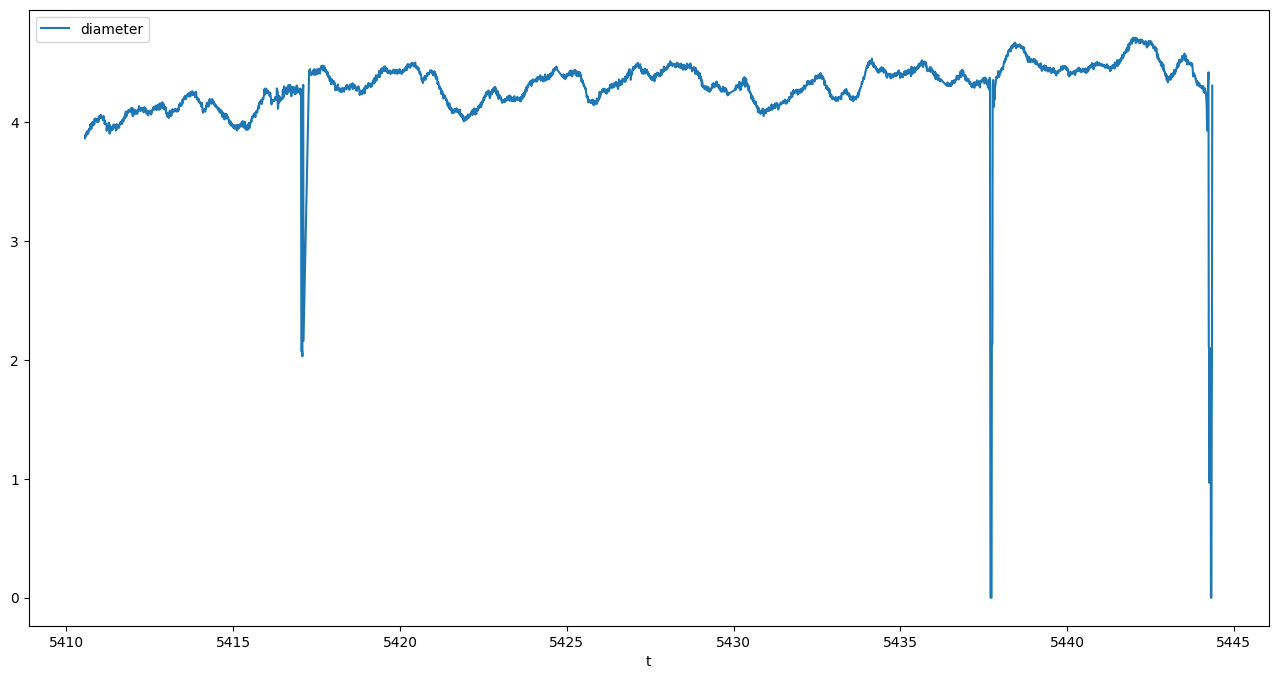

In [11]:
pupil.plot_pd()

<Axes: xlabel='t'>

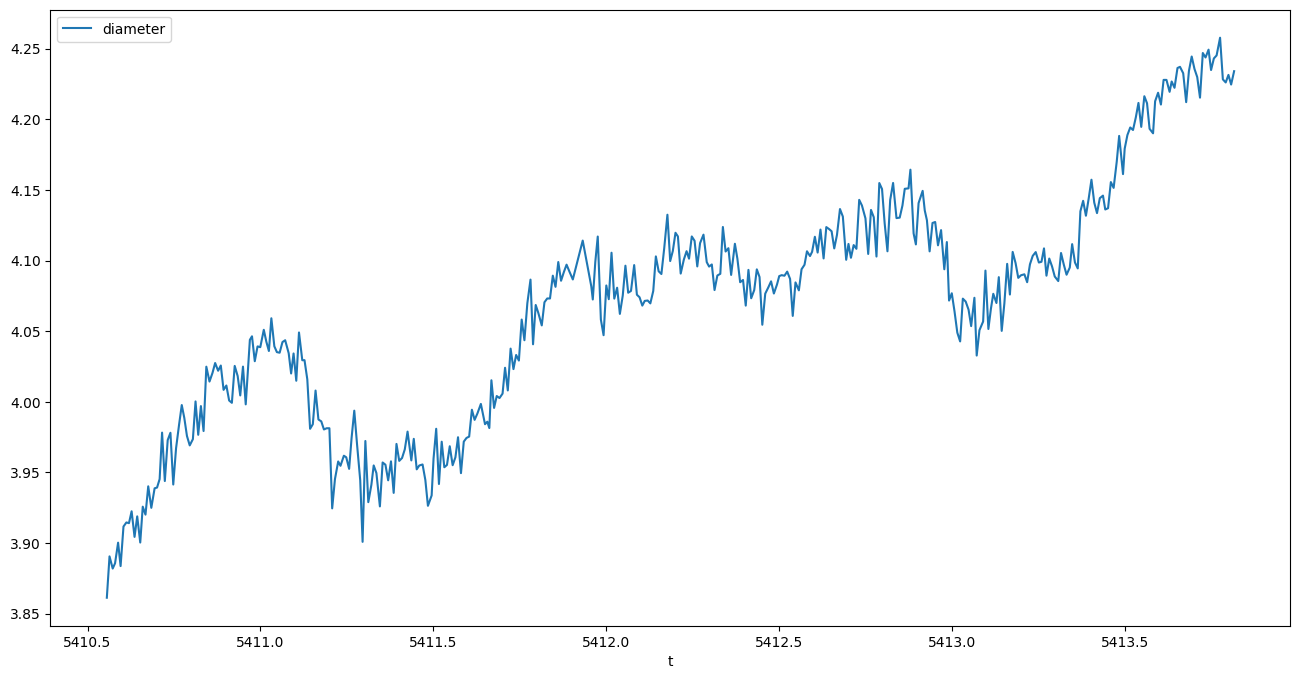

In [12]:
pupil.plot_pd(end=400)

As you can see, the pupil diameter oscillates, rather than consistently being the same.

Let's try smoothing the diameter data.

<Axes: xlabel='t'>

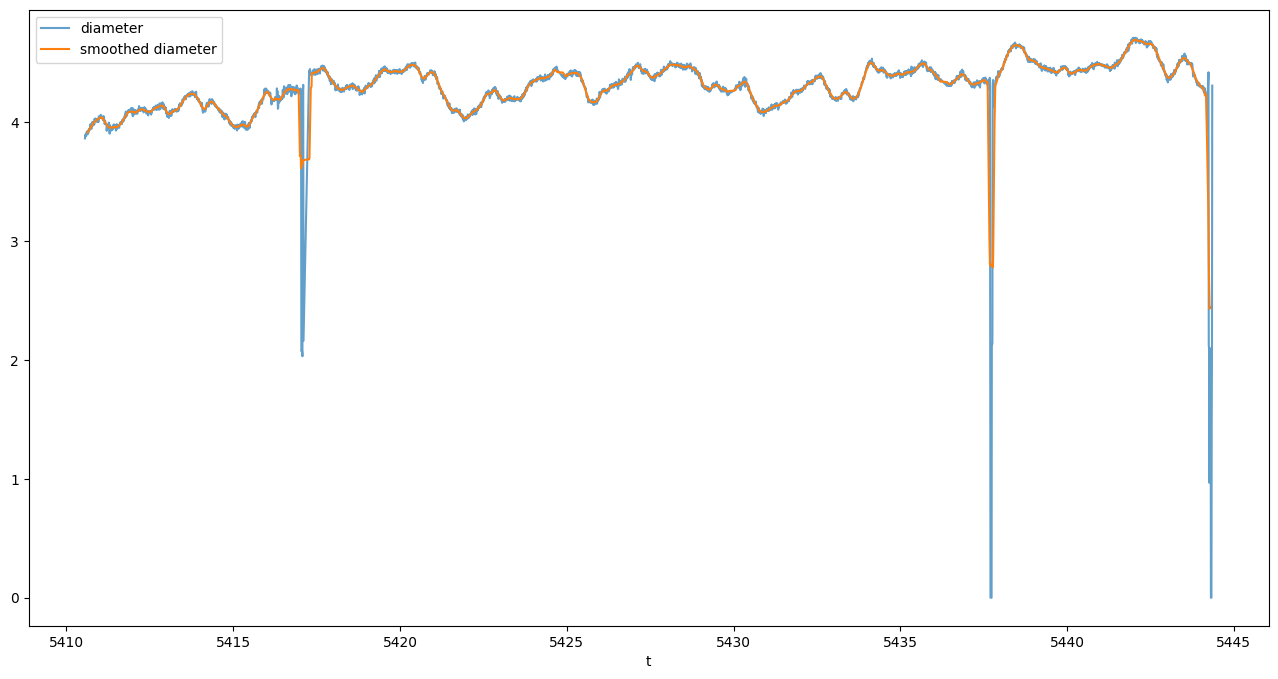

In [13]:
ax = pupil.plot_pd(plot_kwargs=dict(alpha=0.7))
pupil.rolling_mean(20).plot_pd(ax=ax, label="smoothed diameter")

A rolling mean of 100 does appear to smooth the data remotely well, tho clearly it's a bit offset.

[Text(0.5, 1.0, '$LPD[t]$ vs $RPD[t]$'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'pupil diameter')]

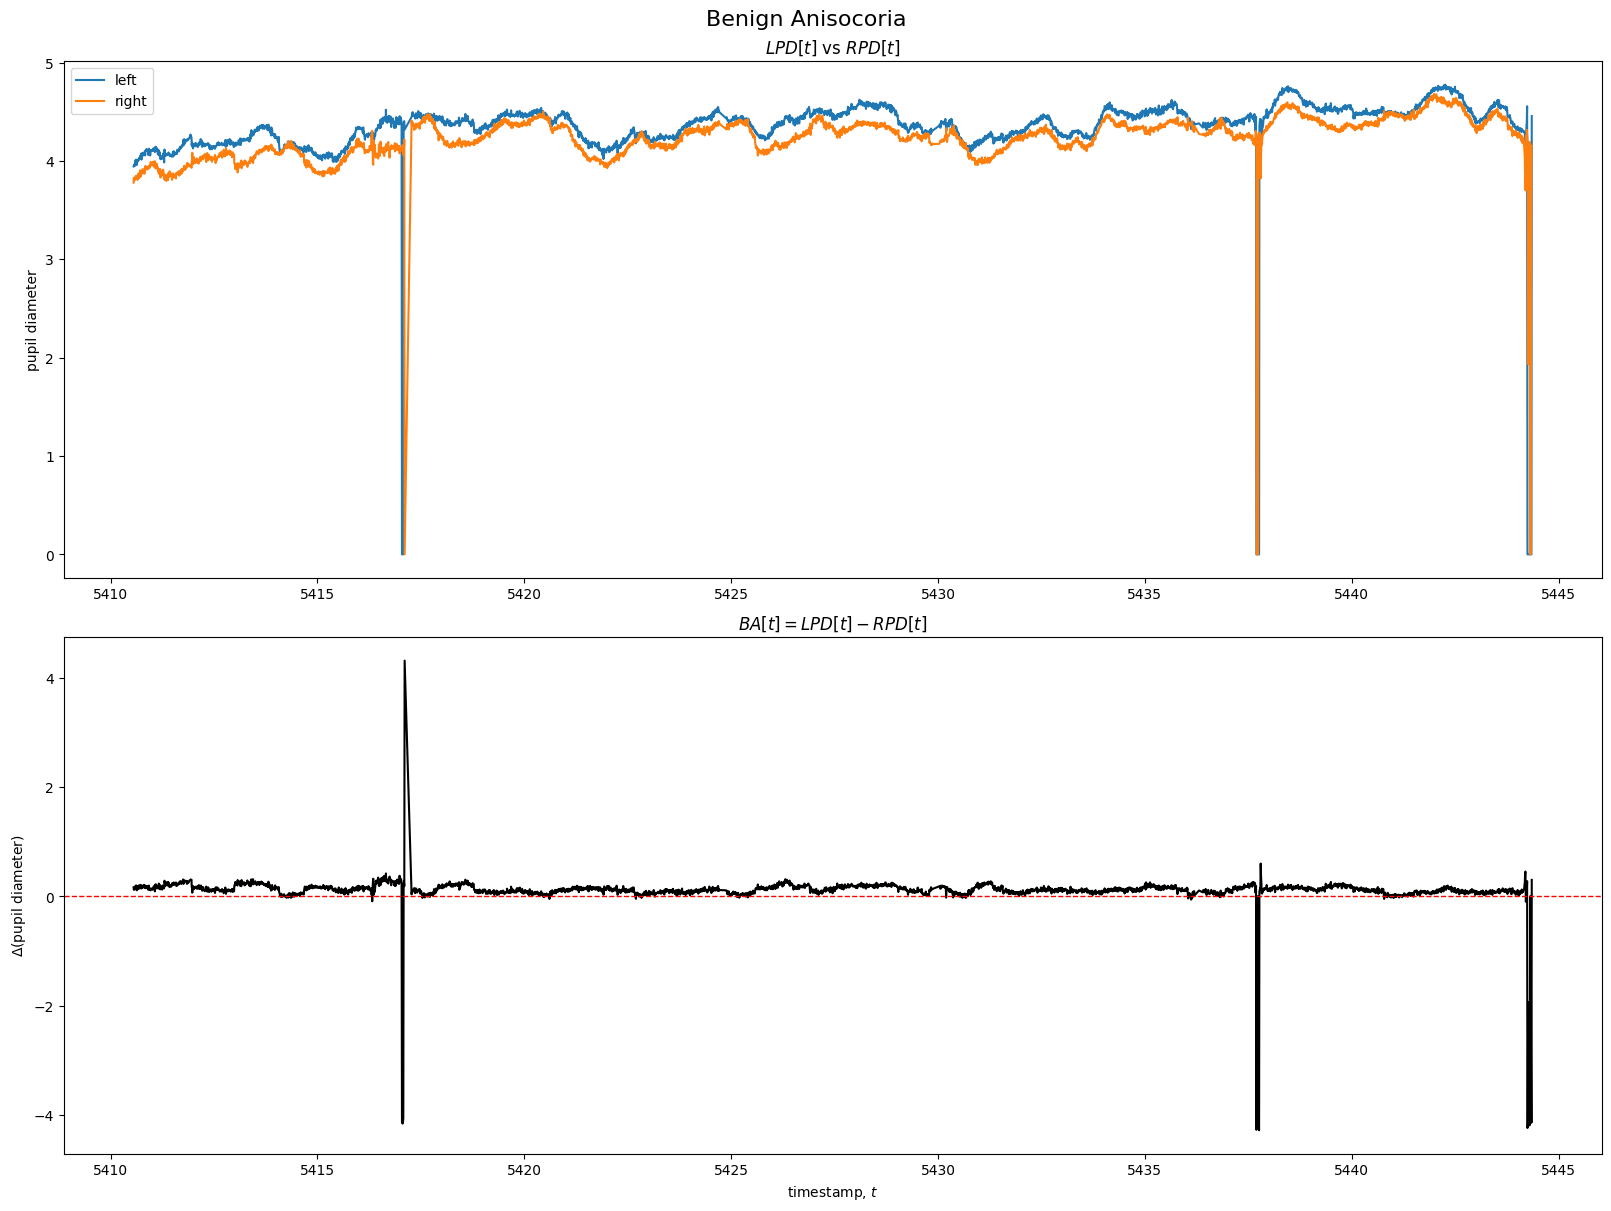

In [14]:
fig, axes = plt.subplots(2, 1, constrained_layout=True, figsize=(16, 12))

fig.suptitle('Benign Anisocoria', fontsize=16)

pupil.plot_ba(ax=axes[1])

pupil.plot_lpd(ax=axes[0], label="left")
pupil.plot_rpd(ax=axes[0], label="right")

axes[0].set(
    title = "$LPD[t]$ vs $RPD[t]$",
    xlabel = "",
    ylabel = "pupil diameter"
)

## Blinks Data

In [15]:
pd.read_csv("../../data/colet/participant0/task0/blinks.csv")

,id,start_timestamp,duration,end_timestamp,start_frame_index,index,end_frame_index,confidence,filter_response,base_data
0,1,5437.625617,0.236131,5437.861748,37,40,44,0.703872,0.5068225043614704 0.5512669488059149 0.595711...,5437.625617 5437.629564 5437.633621 5437.63786...
1,2,5444.161561,0.180073,5444.341634,231,233,236,0.553669,0.5048782729116744 0.5493227173561188 0.592878...,5444.161561 5444.165642 5444.169793 5444.17554...


### EDA on TLX Annotations

In [16]:
import json

rows = []

for participant in range(46):
    for task in range(4):
        with open(f"../../data/colet/participant{participant}/task{task}/annotation.json") as f:
            annotation = json.load(f)
        rows.append({
            **annotation,
            "participant": participant+1,
            "task": task+1
        })

annotations = pd.DataFrame(rows)
annotations

,mental,physical,temporal,performance,effort,frustration,participant,task
0,10.0,5.0,15.0,25.0,25.0,10.0,1,1
1,50.0,30.0,25.0,50.0,15.0,25.0,1,2
2,100.0,10.0,75.0,80.0,90.0,20.0,1,3
3,60.0,15.0,45.0,50.0,20.0,25.0,1,4
4,20.0,10.0,20.0,10.0,20.0,15.0,2,1
...,...,...,...,...,...,...,...,...
179,85.0,45.0,80.0,55.0,85.0,25.0,45,4
180,10.0,5.0,15.0,0.0,10.0,5.0,46,1
181,10.0,30.0,100.0,10.0,45.0,15.0,46,2
182,75.0,5.0,55.0,15.0,55.0,20.0,46,3


In [17]:
aggs = annotations.groupby("task").mean()[[
    "mental", "physical", "temporal", "performance", "effort", "frustration"
]].unstack().reset_index().rename(columns={0: "score", "level_0": "class"})
aggs

,class,task,score
0,mental,1,25.978261
1,mental,2,36.630435
2,mental,3,67.173913
3,mental,4,73.043478
4,physical,1,16.413043
5,physical,2,19.891304
6,physical,3,26.847826
7,physical,4,27.934783
8,temporal,1,19.130435
9,temporal,2,41.521739


<Axes: xlabel='task', ylabel='score'>

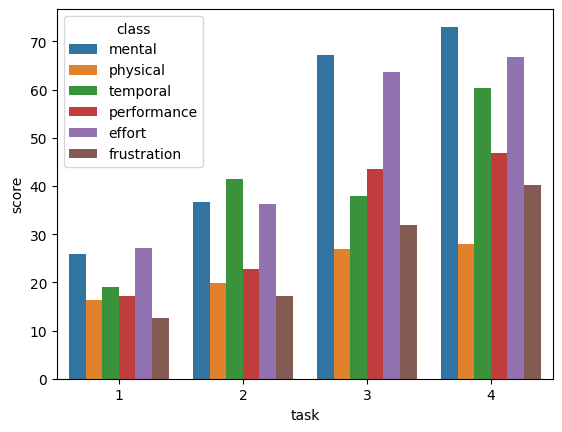

In [18]:
import seaborn as sns

sns.barplot(aggs, x="task", y="score", hue="class")

<Axes: xlabel='class', ylabel='score'>

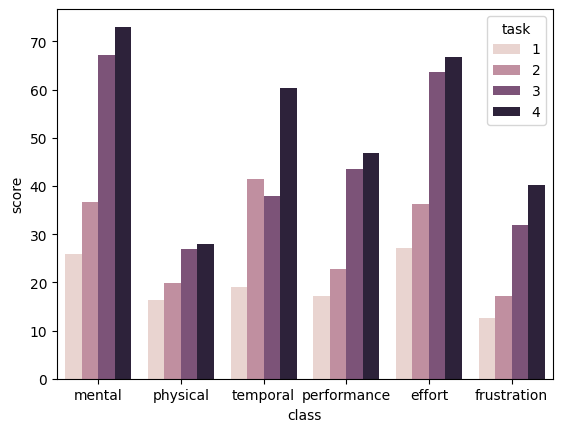

In [19]:
sns.barplot(aggs, x="class", y="score", hue="task")

In [20]:
scores = annotations.set_index(["participant","task"]).stack().reset_index().rename(columns={"level_2": "class", 0: "score"})
scores

,participant,task,class,score
0,1,1,mental,10.0
1,1,1,physical,5.0
2,1,1,temporal,15.0
3,1,1,performance,25.0
4,1,1,effort,25.0
...,...,...,...,...
1099,46,4,physical,25.0
1100,46,4,temporal,75.0
1101,46,4,performance,30.0
1102,46,4,effort,80.0


<Axes: xlabel='task', ylabel='score'>

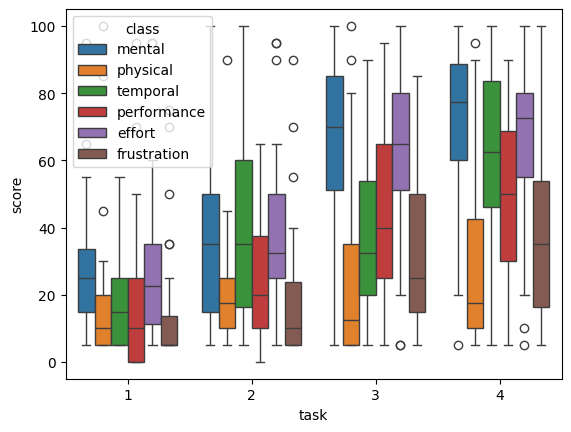

In [21]:
sns.boxplot(scores, x="task", y="score", hue="class")